# Project: Investigate a Dataset - [TMDb]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The Dataset I will be working on in this project is the TMDb dataset That has various Information about more than 10000 movies
just like the popularity, budget, revenue, title, cast, director, production company, describtion of the film and othe information that would help me in my analysis and drawing conclusions.   

### Question(s) for Analysis
>**Questions to analyse:**

>**Q1**:What genre has the most popularity between people?

>**Q2**:How the trends changed over the years before and after the year 2000?

>**Q3**:Does the runtime of films  has association with popularity?

>**Q4**:What is the films that got the maximum and minimum (profit,budget,revenue,runtime

>**Q5**:What is the year that its films got the biggest profits?

>**Q6**:Is there any association between budget and the ratings of the film("vote_average"


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [64]:
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## Displaying Some information about the Dataframe 
- Number of rows and columns and data types of them.
- Some descriptive statistics and information

In [65]:
df.shape

(10866, 21)

In [66]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


## Data Cleaning
 

## Function to check for the duplicated rows, non values and to clean it.
### Changing Zero values in the ["budget","revenue"] to NAN to clean it.

In [68]:
df[["budget","revenue"]] = df[["budget","revenue"]].replace(0,np.NAN)
def clean(df):
    
    print(f"Number Of Duplicate Rows: {df.duplicated().sum()}")
    print(f"Number of non values:\n{df[df.columns].isnull().sum()}")
    
    df.drop_duplicates(inplace=True)
    df.dropna(inplace=True)
    
    print("="*30)
    print(f"Number Of Duplicate Rows After Cleaning: {df.duplicated().sum()}")
    print(f"Number of non values After Cleaning:\n{df[df.columns].isnull().sum()}")
    
clean(df)
    

Number Of Duplicate Rows: 1
Number of non values:
id                         0
imdb_id                   10
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64
Number Of Duplicate Rows After Cleaning: 0
Number of non values After Cleaning:
id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline       

## Changing the "|" to "," in str used columns.

In [69]:
df["genres"] = df["genres"].str.replace("|",",")
df["cast"] = df["cast"].str.replace("|",",")
df["production_companies"] = df["production_companies"].str.replace("|",",")

df["cast"].head()

0    Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vi...
1    Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nic...
2    Shailene Woodley,Theo James,Kate Winslet,Ansel...
3    Harrison Ford,Mark Hamill,Carrie Fisher,Adam D...
4    Vin Diesel,Paul Walker,Jason Statham,Michelle ...
Name: cast, dtype: object

## Making changes on the "release_date" column type.

In [70]:
df["release_date"] = pd.to_datetime(df["release_date"])
df["release_date"].dtype == 'datetime64[ns]'

True

## Dropping some unused columns to target specific data and adding a new "profit" column.

In [71]:
df = df.drop(["imdb_id","tagline","homepage","keywords","overview"],axis=1)
df["profit"] = df["revenue"] - df["budget"]
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,"Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vi...",Colin Trevorrow,124,"Action,Adventure,Science Fiction,Thriller","Universal Studios,Amblin Entertainment,Legenda...",2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,"Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nic...",George Miller,120,"Action,Adventure,Science Fiction,Thriller","Village Roadshow Pictures,Kennedy Miller Produ...",2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.284364e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,"Shailene Woodley,Theo James,Kate Winslet,Ansel...",Robert Schwentke,119,"Adventure,Science Fiction,Thriller","Summit Entertainment,Mandeville Films,Red Wago...",2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.852382e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,"Harrison Ford,Mark Hamill,Carrie Fisher,Adam D...",J.J. Abrams,136,"Action,Adventure,Science Fiction,Fantasy","Lucasfilm,Truenorth Productions,Bad Robot",2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.868178e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,"Vin Diesel,Paul Walker,Jason Statham,Michelle ...",James Wan,137,"Action,Crime,Thriller","Universal Pictures,Original Film,Media Rights ...",2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.316249e+09


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (What genre has the most popularity between people?)

In [72]:
# Extracting the unique genres
gen = df["genres"].unique()
unique_gen = set()
for i in gen:
    if "," not in i:
       unique_gen.add(i)
unique_gen = list(unique_gen)
unique_gen

['Horror',
 'Action',
 'Documentary',
 'Comedy',
 'Drama',
 'Thriller',
 'Science Fiction',
 'Western',
 'Animation',
 'Adventure']

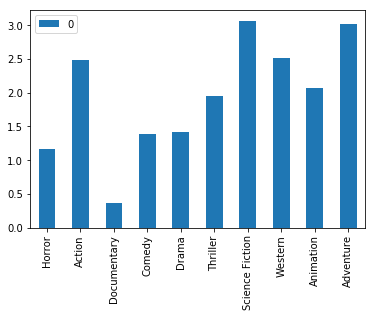

In [73]:
g_mean = []
for g in unique_gen:
    g_mean.append(df[df["genres"].str.contains(g)].popularity.mean())
    
gen_popularity = pd.DataFrame(g_mean,unique_gen)
gen_popularity.plot(kind="bar");

#### This graph show that genre with the highest popularity between people is "Sience Fition" after it comes "Adventure" column and the least genre "Documentry"

### Research Question 2  (How the trends changed over the years esspecially before and after the year 2000?)

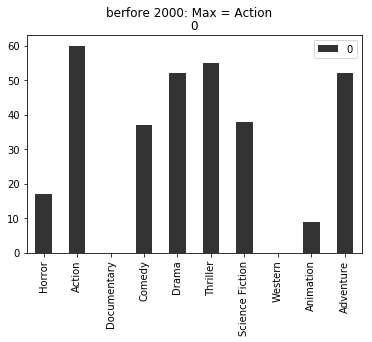

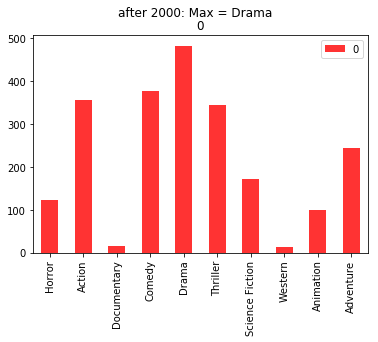

In [74]:
df[(df["genres"].str.contains(unique_gen[1])) & (df["release_year"] < 2000)]

old_gen_freq = []
new_gen_freq = []
for g in unique_gen:
    old_gen_freq.append(len(df[(df["genres"].str.contains(g)) & (df["release_year"] < 2000)]))
    new_gen_freq.append(len(df[(df["genres"].str.contains(g)) & (df["release_year"] >= 2000)]))

old_gen_frequency = pd.DataFrame(old_gen_freq,unique_gen)
new_gen_frequency = pd.DataFrame(new_gen_freq,unique_gen)

old_gen_frequency.plot(kind="bar",alpha = 0.8,subplots = True, title="berfore 2000: Max = Action",color="black");
new_gen_frequency.plot(kind="bar",alpha = 0.8,subplots = True, title="after 2000: Max = Drama",color="red");

#### The first graph refers to the genres trends in the past century before 2000: "Action" after it "Thriller"
#### The second graph refers to the genres trends in the present after 2000: "Drama" after it "Comedy"

### Research Question 3  (Does the runtime of films  has association with popularity?)

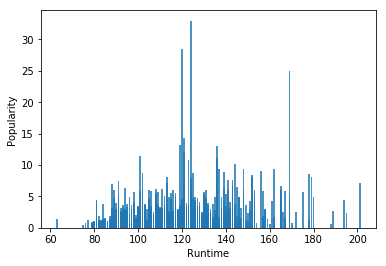

In [75]:
plt.bar(df['runtime'],df['popularity'],alpha=0.8);
plt.xlabel('Runtime');
plt.ylabel('Popularity');

#### this graph as we see states the range that the popularity get high in (90,135) approximately.

### Research Question 4 (What is the films that got the maximum and minimum (profit,budget,revenue,runtime) ?
### With a function that gets maximum and minimum values in the numeric columns and the most and leart frequent in the Object columns?  

In [76]:
def clac_column(column):
    if df[column].dtype == 'O':
        most_freq = df[column].value_counts().idxmax()
        least_freq = df[column].value_counts().idxmin()
        print(f"Most Frequent in the {column} column: {most_freq}")
        print(f"Least Frequent in the {column} column: {least_freq}")
    else:
        max = df[column].max()
        min = df[column].min()
        print("Max Film: {} => {}".format(df.loc[df[column].idxmax(),"original_title"],max))
        print("Minimum Film: {} => {}".format(df.loc[df[column].idxmin(),"original_title"],min))
    

In [77]:
clac_column('profit')

Max Film: Avatar => 2544505847.0
Minimum Film: The Warrior's Way => -413912431.0


In [78]:
clac_column('budget')

Max Film: The Warrior's Way => 425000000.0
Minimum Film: Love, Wedding, Marriage => 1.0


In [79]:
clac_column('revenue')

Max Film: Avatar => 2781505847.0
Minimum Film: Boy => 43.0


### Research Question 5 (What is the year that its films got the biggest profits?) 

In [80]:
years = df["release_year"].unique()
profits = []
for year in years:
    df_year = df[df.release_year == year]
    profits.append(df_year['profit'].sum())

df_best_year = pd.DataFrame(profits,years)
df_best_year = df_best_year[df_best_year[0] > 0]
df_best_year.columns = ["y"]
df_best_year.sort_values(by = ["y"])
df_best_year = df_best_year["y"][0:5]
print("The year with the highest profits: {}".format(df_best_year.idxmax()))

The year with the highest profits: 2015


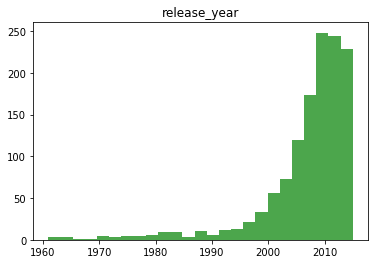

In [81]:
plt.hist(df['release_year'],alpha=0.7, bins=25,color = 'green');
plt.title('release_year');

#### We can see that this graph is left-skewed and refers to the increase of the number of films after the begining of this century till its peak in 2008-2012 period. 

### Research Question 6 (Is there any association between budget and the ratings of the film("vote_average")?) 

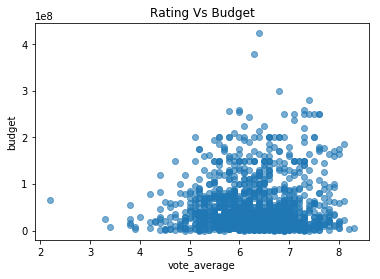

In [82]:
plt.scatter(df['vote_average'],df['budget'],alpha=0.6);
plt.xlabel('vote_average');
plt.ylabel('budget');
plt.title('Rating Vs Budget');

#### This graph clarify the relation between Rating and budget and tells us that the high budget dooesn't confirm high rating it could be the opposite. 

<a id='conclusions'></a>
## Conclusions

>**Q1**:What genre has the most popularity between people?

>Conclusion: The genre with the most popularity is "Science Fiction" and the "Adventure" comes right after it.

>**Q2**:How the trends changed over the years before and after the year 2000?

>Conclusion: before the year 2000 the "Action" genre was the trend and "Thriller" in the second place but after 2000 the trends has changed and the "Drama" genre is on top and "Comedy" in the second place.

>**Q3**:Does the runtime of films has association with popularity?

>Conclusion: the range of runtime that has high popularity is between 90 to 130 minutes and the popularity of the films 

>**Q5**:What is the year that its films got the biggest profits?

>Conclusion: The calculation resulted that The year with the highest profits: 2015

>**Q6**:Is there any association between budget and the ratings of the film("vote_average")?

>Conclusion: There's no assosiation between the high budget and good rating as we can see it's quiet the opposite in lots of films so it doesn't depend on high budget.  


>**Limitations**: this analysis was done on the filtered data considring all of its important properties. we are not sure if the data provided to us is completel corect and up-to-date. As the budget and revenue columns doesn't have a currency unit so worked on it with available. and the filtering of the duplicates and missing values could slightly affect the analysis.


In [62]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0